# Visualizing a Demo

Awpy allows you to easily visualize Counter-Strike 2 data. We provide basic gif and heatmap creation functions. First, start by parsing a demo.

In [1]:
from awpy import Demo

# Demo: https://www.hltv.org/matches/2372746/spirit-vs-natus-vincere-blast-premier-spring-final-2024 (de_dust2, Map 2)
dem = Demo("spirit-vs-natus-vincere-m2-dust2.dem", verbose=False)
dem.parse(player_props=["health", "armor_value", "pitch", "yaw"])

## Plotting a tick

You can plot a single frame with `from awpy.plot import plot`. A list of useful visual settings is found in `from awpy.plot import PLOT_SETTINGS`.

plotting donk (ct) at 1328.0406494140625, 996.1280517578125, -7.7825927734375
plotting magixx (ct) at 524.268310546875, 2447.859130859375, 96.44414520263672
plotting w0nderful (t) at -476.17962646484375, 1704.5201416015625, -123.5478515625
plotting sh1ro (ct) at 366.1332702636719, 1530.1920166015625, 2.346383571624756
plotting iM (t) at -340.0313720703125, 1895.1336669921875, -120.65313720703125
plotting Aleksib (t) at -9.9522705078125, 1581.9686279296875, 2.02828311920166
plotting chopper (ct) at -1832.733642578125, 2077.6494140625, -4.66705322265625
plotting jL (t) at -2185.384033203125, 1143.0301513671875, 35.200462341308594
plotting zont1x (ct) at -1611.8778076171875, 2195.452880859375, -3.59246826171875
plotting b1t (t) at 624.8894653320312, 649.5078125, 0.9615340232849121


(<Figure size 1024x1024 with 1 Axes>, <Axes: >)

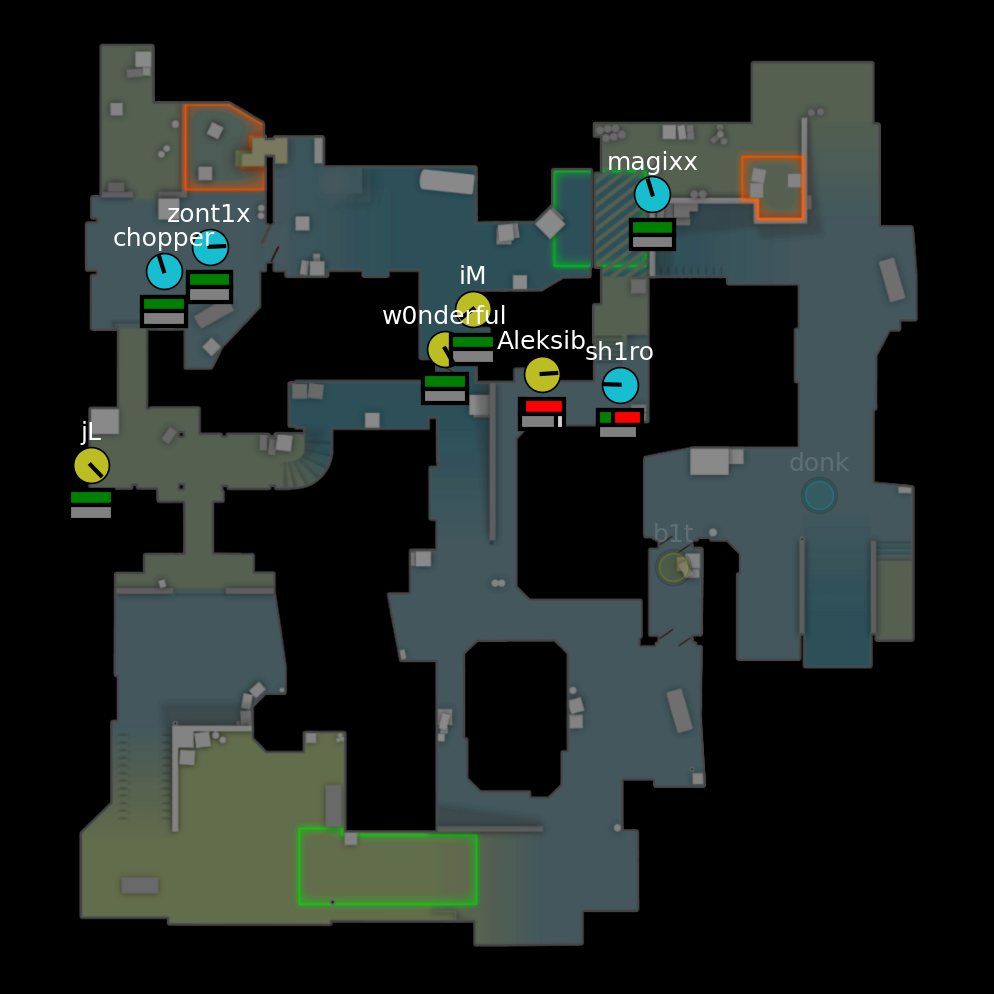

In [12]:
import polars as pl
from awpy.plot import plot, PLOT_SETTINGS

# Get a random tick
frame_df = dem.ticks.filter(pl.col("tick") == dem.ticks["tick"].unique()[14345])
frame_df = frame_df[
    ["X", "Y", "Z", "health", "armor", "pitch", "yaw", "side", "name"]
]

points = []
point_settings = []

for row in frame_df.iter_rows(named=True):
    points.append((row["X"], row["Y"], row["Z"]))
    print(f"plotting {row['name']} ({row['side']}) at {row['X']}, {row['Y']}, {row['Z']}")

    # Determine team and corresponding settings
    settings = PLOT_SETTINGS[row["side"]].copy()

    # Add additional settings
    settings.update(
        {
            "hp": row["health"],
            "armor": row["armor"],
            "direction": (row["pitch"], row["yaw"]),
            "label": row["name"],
        }
    )

    point_settings.append(settings)

plot(map_name="de_dust2", points=points, point_settings=point_settings)

## Gif

Oftentimes, we want to plot a series of frames, which we can do with `from awpy.plot import gif`. Below, we plot the every 128th tick for round 1 as a gif. It can take a while to create, so please be patient!

In [14]:
from awpy.plot import gif, PLOT_SETTINGS
from tqdm import tqdm

frames = []

for tick in tqdm(dem.ticks.filter(pl.col("round_num") == 1)["tick"].unique().to_list()[::128]):
    frame_df = dem.ticks.filter(pl.col("tick") == tick)
    frame_df = frame_df[
        ["X", "Y", "Z", "health", "armor", "pitch", "yaw", "side", "name"]
    ]

    points = []
    point_settings = []

    for row in frame_df.iter_rows(named=True):
        points.append((row["X"], row["Y"], row["Z"]))

        # Determine team and corresponding settings
        settings = PLOT_SETTINGS[row["side"]].copy()

        # Add additional settings
        settings.update(
            {
                "hp": row["health"],
                "armor": row["armor"],
                "direction": (row["pitch"], row["yaw"]),
                "label": row["name"],
            }
        )

        point_settings.append(settings)

    frames.append({"points": points, "point_settings": point_settings})

print("Finished processing frames. Creating gif...")
gif("de_dust2", frames, "de_dust2.gif", duration=100)

100%|██████████| 54/54 [00:00<00:00, 913.42it/s]


Finished processing frames. Creating gif...


100%|██████████| 54/54 [00:09<00:00,  5.71it/s]


## Heatmap

Finally, you can also create heatmaps. Below, we create heatmaps for a random sample of 100,000 player locations in the demo. The available `method` options are `hex`, `hist` and `kde`. You will also want to play with the `size` parameter. The values shown below are good starting points for the corresponding `method`, but it will depend on what you are visualizing.

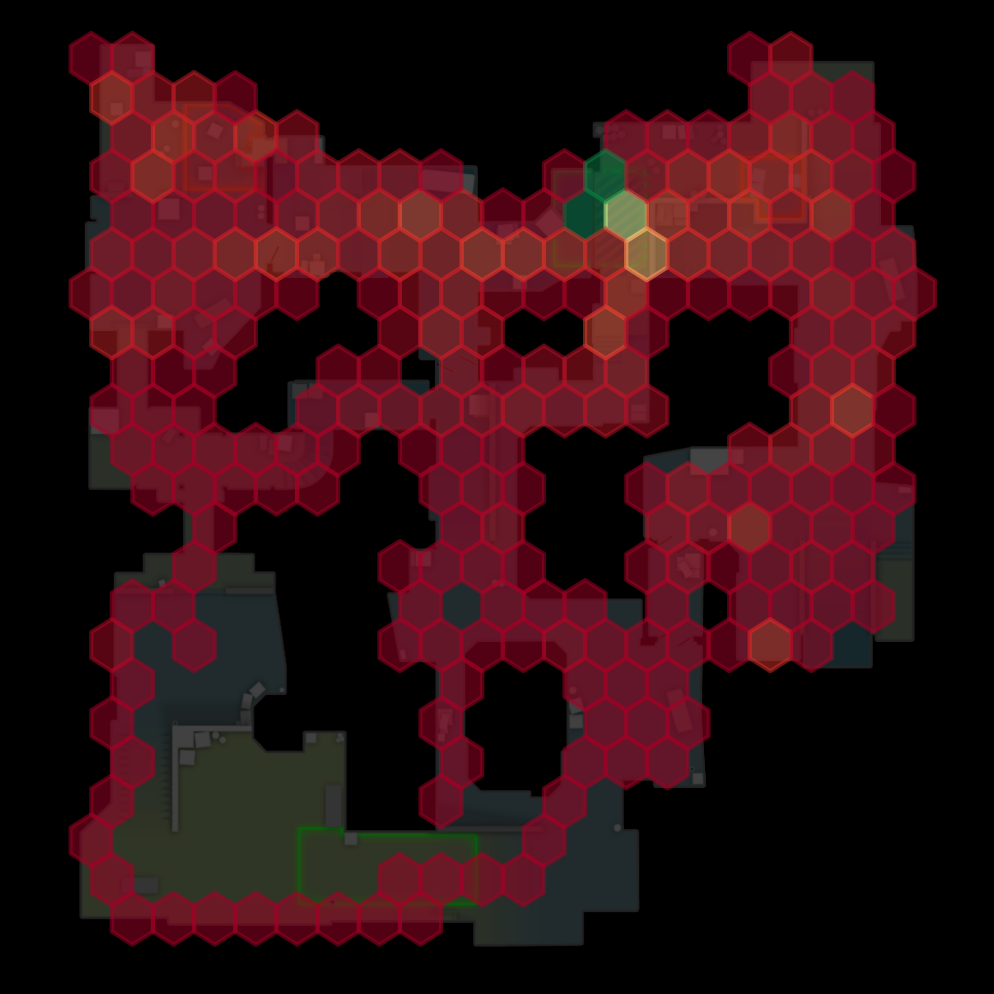

In [25]:
from awpy.plot import heatmap

player_locations = list(
    dem.ticks.filter(pl.col("health") > 0, pl.col("side") == "ct")[["X", "Y", "Z"]].sample(100000).iter_rows()
)
fig, ax = heatmap(map_name="de_dust2", points=player_locations, method="hex", size=20)

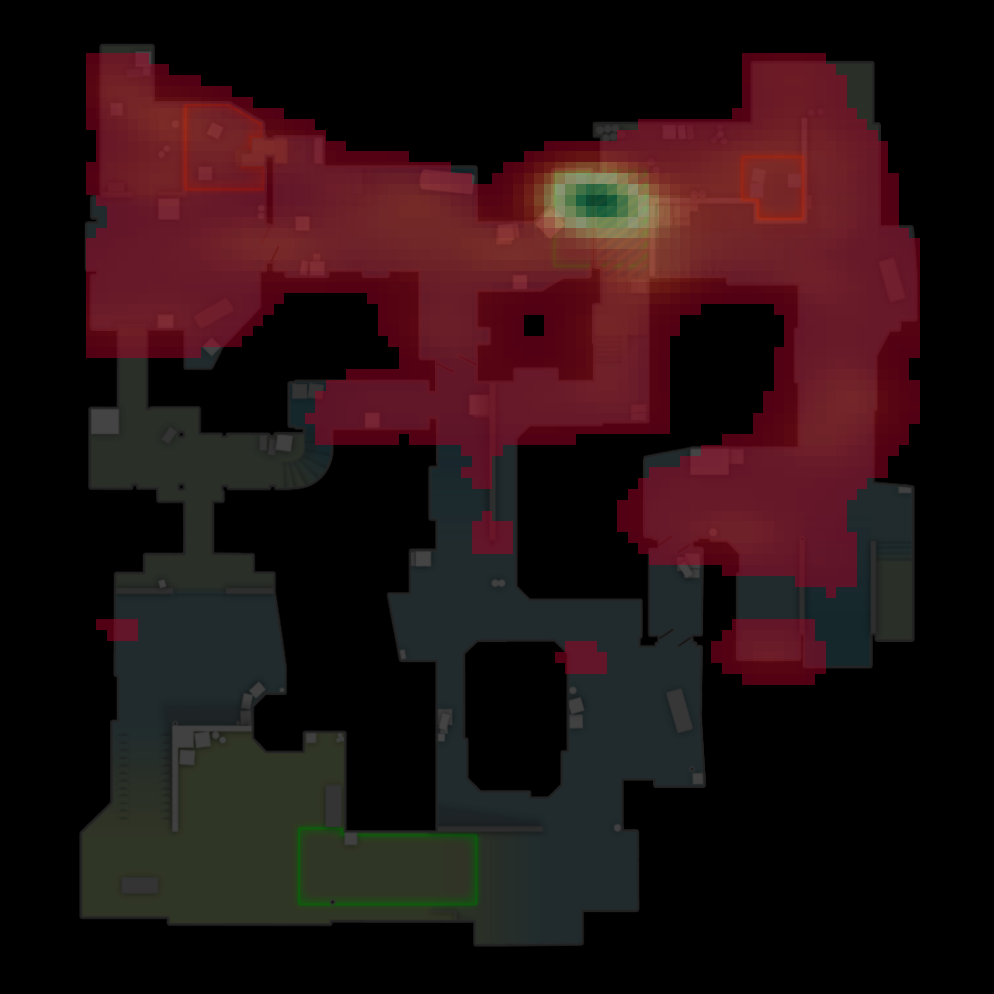

In [27]:
from awpy.plot import heatmap

player_locations = list(
    dem.ticks.filter(pl.col("health") > 0, pl.col("side") == "ct")[["X", "Y", "Z"]].sample(100000).iter_rows()
)
fig, ax = heatmap(
    map_name="de_dust2",
    points=player_locations,
    method="kde",
    size=80,
    kde_lower_bound=0.01
)